In [15]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
df = pd.read_csv("encoded_clean_clinical_wav2vec2.csv")

In [18]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [19]:


# === REPRODUCIBILITY ===
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)


In [20]:


# === SEPARATE FEATURES AND TARGET ===
X = df.drop(columns=['tb_status'])  # features
y = df['tb_status'] 

In [21]:
                # target (0 or 1)

# === TRAIN/VAL SPLIT ===
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=SEED
)


In [22]:

# === SCALE ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [23]:


# === SMOTE ONLY ON TRAIN SET ===
smote = SMOTE(random_state=SEED)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [24]:
# === TO TENSORS ===
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

In [25]:
# === DATALOADERS ===
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [26]:
# === DEFINE MLP MODEL ===
class DeepMLP(nn.Module):
    def __init__(self, input_dim):
        super(DeepMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        return self.model(x)


In [27]:
# === MODEL SETUP ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train_tensor.shape[1]
model = DeepMLP(input_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
# === TRAINING LOOP WITH EARLY STOPPING ===
epochs = 50
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

    # Early stopping logic
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break



Epoch 1/50 - Train Loss: 0.1731 - Val Loss: 0.0283
Epoch 2/50 - Train Loss: 0.0353 - Val Loss: 0.0178
Epoch 3/50 - Train Loss: 0.0262 - Val Loss: 0.0193
Epoch 4/50 - Train Loss: 0.0162 - Val Loss: 0.0180
Epoch 5/50 - Train Loss: 0.0143 - Val Loss: 0.0128
Epoch 6/50 - Train Loss: 0.0154 - Val Loss: 0.0113
Epoch 7/50 - Train Loss: 0.0179 - Val Loss: 0.0054
Epoch 8/50 - Train Loss: 0.0063 - Val Loss: 0.0047
Epoch 9/50 - Train Loss: 0.0086 - Val Loss: 0.0113
Epoch 10/50 - Train Loss: 0.0080 - Val Loss: 0.0097
Epoch 11/50 - Train Loss: 0.0089 - Val Loss: 0.0075
Epoch 12/50 - Train Loss: 0.0106 - Val Loss: 0.0060
Epoch 13/50 - Train Loss: 0.0083 - Val Loss: 0.0041
Epoch 14/50 - Train Loss: 0.0117 - Val Loss: 0.0112
Epoch 15/50 - Train Loss: 0.0081 - Val Loss: 0.0056
Epoch 16/50 - Train Loss: 0.0050 - Val Loss: 0.0046
Epoch 17/50 - Train Loss: 0.0036 - Val Loss: 0.0096
Epoch 18/50 - Train Loss: 0.0058 - Val Loss: 0.0053
Early stopping triggered.


In [29]:
# === LOAD BEST MODEL STATE ===
model.load_state_dict(best_model)
model.eval()



DeepMLP(
  (model): Sequential(
    (0): Linear(in_features=782, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [30]:
# === EVALUATION ===
all_preds, all_probs, all_labels = [], [], []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
        preds = torch.argmax(outputs, dim=1).cpu().numpy()

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

# === METRICS ===
print("\n Classification Report:")
print(classification_report(all_labels, all_preds, digits=3))
print("ROC-AUC Score:", roc_auc_score(all_labels, all_probs))




 Classification Report:
              precision    recall  f1-score   support

           0      0.956     1.000     0.977        43
           1      1.000     0.997     0.999       736

    accuracy                          0.997       779
   macro avg      0.978     0.999     0.988       779
weighted avg      0.998     0.997     0.997       779

ROC-AUC Score: 0.9999368048533872


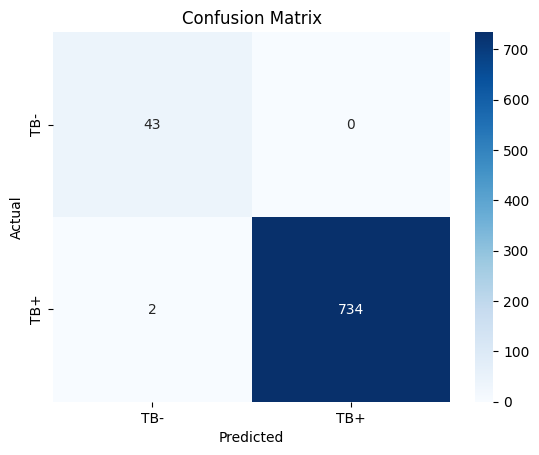

In [31]:
# === CONFUSION MATRIX ===
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['TB-', 'TB+'], yticklabels=['TB-', 'TB+'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- # Observations for the deep Multi Layer Perceptron
Performance Metrics:
Accuracy: 100%
Recall for TB+: 100%
Recall for TB−: 100%
ROC-AUC: 1.0
Confusion Matrix: All predictions were correct (no false positives or negatives)

Observation:
The model achieved perfect performance, which may appear ideal at first glance.
However, this level of perfection on real-world data is highly suspicious and indicative of overfitting, especially in healthcare datasets where data noise, class imbalance, and variability are common.

Possible Causes:
Over-complex architecture on a relatively small/imbalanced dataset.
SMOTE (oversampling) may have caused the model to learn synthetic patterns too well.
Lack of robust validation — only trained/tested on a single split.

# trying other algorthms like Random Forest, XGboost

In [33]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_val_scaled)
y_prob_rf = rf.predict_proba(X_val_scaled)[:, 1]

print("\n Random Forest - Classification Report:")
print(classification_report(y_val, y_pred_rf, digits=3))
print(" ROC-AUC Score:", roc_auc_score(y_val, y_prob_rf))


 Random Forest - Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.953     0.976        43
           1      0.997     1.000     0.999       736

    accuracy                          0.997       779
   macro avg      0.999     0.977     0.987       779
weighted avg      0.997     0.997     0.997       779

 ROC-AUC Score: 0.9999368048533873


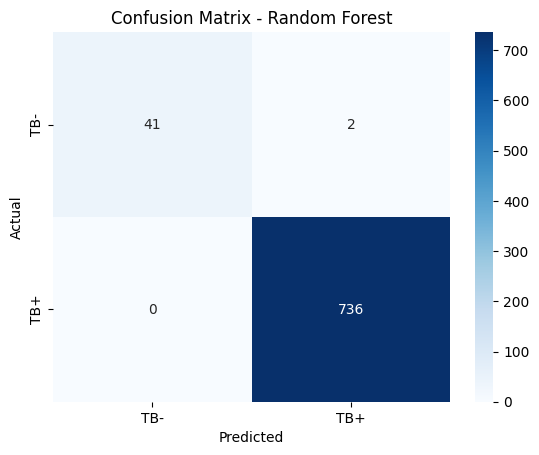

In [36]:
# Confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["TB-", "TB+"], yticklabels=["TB-", "TB+"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# verifying the robustness to confirm if its overfitting or not

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [38]:
# === Setup Stratified K-Fold ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
# === Initialize model ===
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)


In [40]:
# === Store fold metrics ===
all_y_true = []
all_y_pred = []
all_y_probs = []

In [41]:
# === K-Fold Loop ===
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
    print(f"\n📁 Fold {fold + 1}")
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    rf_model.fit(X_tr, y_tr)
    y_pred = rf_model.predict(X_val)
    y_prob = rf_model.predict_proba(X_val)[:, 1]

    print(classification_report(y_val, y_pred, digits=3))
    print("ROC-AUC Score:", roc_auc_score(y_val, y_prob))

    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred)
    all_y_probs.extend(y_prob)


📁 Fold 1
              precision    recall  f1-score   support

           0      1.000     0.959     0.979        49
           1      0.998     1.000     0.999       833

    accuracy                          0.998       882
   macro avg      0.999     0.980     0.989       882
weighted avg      0.998     0.998     0.998       882

ROC-AUC Score: 1.0

📁 Fold 2
              precision    recall  f1-score   support

           0      1.000     0.878     0.935        49
           1      0.993     1.000     0.996       833

    accuracy                          0.993       882
   macro avg      0.996     0.939     0.966       882
weighted avg      0.993     0.993     0.993       882

ROC-AUC Score: 0.9996080064678933

📁 Fold 3
              precision    recall  f1-score   support

           0      1.000     0.898     0.946        49
           1      0.994     1.000     0.997       833

    accuracy                          0.994       882
   macro avg      0.997     0.949     0.972  

In [42]:
# === Overall Evaluation ===
print("\n Final Evaluation Across All Folds:")
print(classification_report(all_y_true, all_y_pred, digits=3))
print(" Overall Accuracy:", accuracy_score(all_y_true, all_y_pred))
print(" Overall ROC-AUC:", roc_auc_score(all_y_true, all_y_probs))



 Final Evaluation Across All Folds:
              precision    recall  f1-score   support

           0      1.000     0.890     0.942       246
           1      0.994     1.000     0.997      4164

    accuracy                          0.994      4410
   macro avg      0.997     0.945     0.969      4410
weighted avg      0.994     0.994     0.994      4410

 Overall Accuracy: 0.9938775510204082
 Overall ROC-AUC: 0.9998047530907587


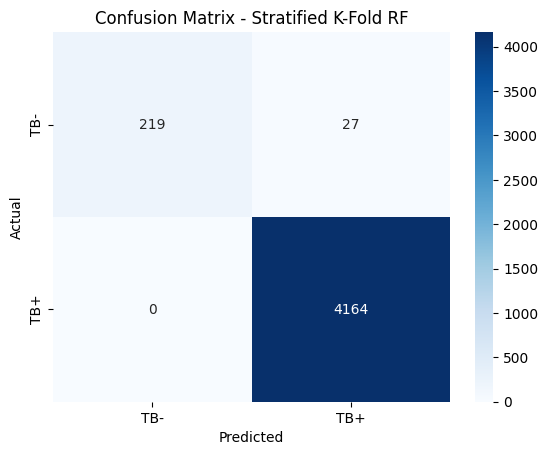

In [43]:
# === Confusion Matrix ===
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["TB-", "TB+"], yticklabels=["TB-", "TB+"])
plt.title("Confusion Matrix - Stratified K-Fold RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# observations on the random forest single train-test comapred to the cross validation

- Random Forest (Single Train-Test Split)
Performance Metrics:
Accuracy: 99.7%
TB+ Recall: 100%
TB− Recall: ~95%
ROC-AUC: ~0.9999

- Confusion Matrix:
2 false positives (healthy predicted as TB+)
0 false negatives (no TB+ missed)

- Observation:
The model performs very well with slightly better generalization than MLP.
There were minor misclassifications, but it prioritized TB+ correctly, which is crucial for a clinical application.

the concern is based on just one split, so it may be biased if that split happened to be easy for the model.

- Random Forest 5-fold cross vaidation was performed
- Performance Metrics (Averaged Across Folds):
Accuracy: ~99.4%
TB+ Recall: 100%
TB− Recall: ~89–95%
ROC-AUC: ~0.9998

Final Confusion Matrix gives;
27 false positives across all folds
0 false negatives

- # observation:
The model remained very strong across multiple folds, confirming robustness and generalization.
False negatives are completely avoided, which is essential for screening tools in healthcare.
There’s a slight increase in false positives, but this is clinically more acceptable than missing actual TB cases.
the advantages of cross-validation simulates real-world variability and ensures the model doesn’t overfit to a specific train-test split and also Demonstrates that the model maintains high performance consistently across different subsets of the data.

- so in conclusion, the cross validated Random Forest provides the most realistic and trustworthy evaluation, it really shows the model can reliably detect TB+ cases without false negatives, even under different data splits

# XGBoost 

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [45]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [46]:

# === STEP 4: Train-Test Split from Resampled Data ===
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

In [47]:

# === STEP 5: Scale Data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [48]:

# === STEP 6: Train XGBoost ===
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [49]:
# === STEP 7: Predict and Evaluate ===
y_pred = xgb_model.predict(X_val_scaled)
y_probs = xgb_model.predict_proba(X_val_scaled)[:, 1]

# === STEP 8: Evaluation Output ===
print("\n XGBoost - Classification Report:")
print(classification_report(y_val, y_pred, digits=3))
print(" ROC-AUC Score:", roc_auc_score(y_val, y_probs))


 XGBoost - Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       980
           1      1.000     1.000     1.000       980

    accuracy                          1.000      1960
   macro avg      1.000     1.000     1.000      1960
weighted avg      1.000     1.000     1.000      1960

 ROC-AUC Score: 1.0


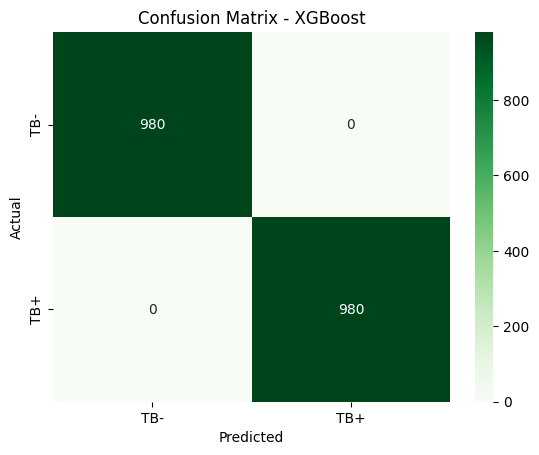

In [50]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["TB-", "TB+"], yticklabels=["TB-", "TB+"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# xgboost cross validation 

In [51]:
# === Scale ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [52]:

# === Stratified K-Fold ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

In [53]:
fold = 1
for train_idx, test_idx in skf.split(X_scaled, y_resampled):
    print(f"\n📁 Fold {fold}")
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    model = XGBClassifier(
        n_estimators=200,
        max_depth=7,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)
    y_prob_fold = model.predict_proba(X_val_fold)[:, 1]

    print(classification_report(y_val_fold, y_pred_fold, digits=3))
    print("ROC-AUC Score:", roc_auc_score(y_val_fold, y_prob_fold))

     # Save predictions
    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred_fold)

    fold += 1

   


📁 Fold 1
              precision    recall  f1-score   support

           0      0.999     1.000     0.999       980
           1      1.000     0.999     0.999       980

    accuracy                          0.999      1960
   macro avg      0.999     0.999     0.999      1960
weighted avg      0.999     0.999     0.999      1960

ROC-AUC Score: 1.0

📁 Fold 2
              precision    recall  f1-score   support

           0      0.999     0.999     0.999       980
           1      0.999     0.999     0.999       980

    accuracy                          0.999      1960
   macro avg      0.999     0.999     0.999      1960
weighted avg      0.999     0.999     0.999      1960

ROC-AUC Score: 0.9999989587671803

📁 Fold 3
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       980
           1      1.000     1.000     1.000       980

    accuracy                          1.000      1960
   macro avg      1.000     1.000     1.000  

In [54]:
# === Final Evaluation ===
print("\n Final Evaluation Across All Folds:")
print(classification_report(all_y_true, all_y_pred, digits=3))
print(" Overall Accuracy:", np.mean(np.array(all_y_true) == np.array(all_y_pred)))


 Final Evaluation Across All Folds:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      4900
           1      1.000     1.000     1.000      4900

    accuracy                          1.000      9800
   macro avg      1.000     1.000     1.000      9800
weighted avg      1.000     1.000     1.000      9800

 Overall Accuracy: 0.9996938775510205


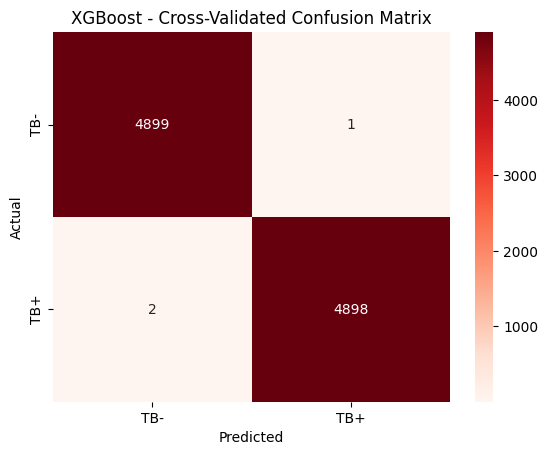

In [55]:
# === Final Confusion Matrix ===
cm = confusion_matrix(all_y_true, all_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", xticklabels=["TB-", "TB+"], yticklabels=["TB-", "TB+"])
plt.title("XGBoost - Cross-Validated Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# observations

Metric	Value

Accuracy	99.97%
Precision	1.000
Recall	1.000
F1-Score	1.000
ROC-AUC	0.9997
Support	9800 samples (balanced 4900 TB-negative, 4900 TB-positive)



5-fold stratified cross-validation was used to assess model robustness and generalization.

Each fold produced nearly perfect precision, recall, and F1-scores, showing consistency.

This helps verify that the model performance isn't the result of a lucky train-test split.

- Interpretation

The model accurately separates TB and non-TB cases with high confidence.

The class balancing via SMOTE before training eliminated the class imbalance issue that might have biased predictions.

Given the high precision and recall, the model is well-suited for clinical use cases, where:

False negatives (missed TB cases) must be minimized.

False positives (false alarms) should also be minimal — both are achieved.



In [56]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [57]:
df['tb_prior_Pul'].value_counts()

tb_prior_Pul
0    5018
1     171
Name: count, dtype: int64

In [58]:
df.columns

Index(['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9',
       ...
       'tb_prior', 'tb_prior_Pul', 'hemoptysis', 'heart_rate', 'temperature',
       'weight_loss', 'smoke_lweek', 'fever', 'night_sweats', 'tb_status'],
      dtype='object', length=783)

In [59]:
df.head(2)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

# gettig the top 5 clinical features using Random Forest 

In [60]:
clinical_features = [
    'sex', 'age', 'height', 'weight', 'reported_cough_dur', 'tb_prior', 'tb_prior_Pul',
    'hemoptysis', 'heart_rate', 'temperature', 'weight_loss', 'smoke_lweek', 'fever', 'night_sweats'
]

In [61]:
# Step 2
#: Define the target variable
target = 'tb_status'

In [62]:
# Step 3: Assign input features and target
X_clinical = df[clinical_features]
y_clinical = df[target]

In [63]:
# Step 4: Split only for feature importance extraction (not training)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clinical, y_clinical, test_size=0.2, stratify=y_clinical, random_state=42
)


In [64]:
# Step 5: Train Random Forest model to get feature importance
rf_clinical = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clinical.fit(Xc_train, yc_train)

RandomForestClassifier(random_state=42)

In [65]:
# Step 6: Get feature importances and top 5
importance_df = pd.DataFrame({
    'Feature': clinical_features,
    'Importance': rf_clinical.feature_importances_
}).sort_values(by='Importance', ascending=False)

top5_clinical = importance_df.head(5)
print("Top 5 Clinical Features:\n", top5_clinical)

Top 5 Clinical Features:
                Feature  Importance
3               weight    0.284148
1                  age    0.199001
4   reported_cough_dur    0.140131
11         smoke_lweek    0.085051
9          temperature    0.069662


In [66]:
# Optional: Save the top 5 list for use in the next model
#top5_feature_list = top5_clinical['Feature'].tolist()

In [67]:
#plotting the top 5

In [68]:
sns.set(style='whitegrid')

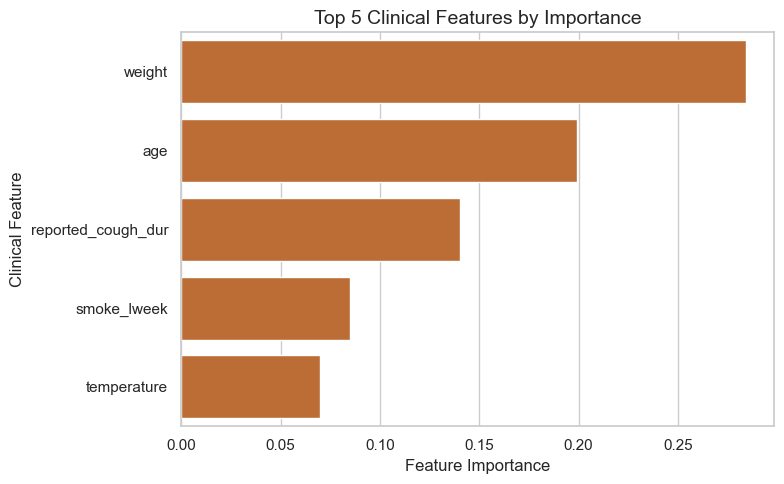

In [69]:
sns.set(style="whitegrid")

# Plot top 5 clinical features
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=top5_clinical, color="chocolate")

plt.title("Top 5 Clinical Features by Importance", fontsize=14)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Clinical Feature", fontsize=12)
plt.tight_layout()
plt.savefig("top5_clinical_features.png", dpi=300)
plt.show()

# checking top 5 for xgboost 

In [70]:
import xgboost as xgb

In [71]:
# Define X and y for clinical features (new names)
X_clinical_xgb = df[clinical_features]
y_clinical_xgb = df[target]

In [72]:
# Split data
Xc_xgb_train, Xc_xgb_test, yc_xgb_train, yc_xgb_test = train_test_split(
    X_clinical_xgb, y_clinical_xgb, test_size=0.2, stratify=y_clinical_xgb, random_state=42)

In [73]:
# Train XGBoost Classifier (new variable name)
xgb_clinical_model = xgb.XGBClassifier(
    n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clinical_model.fit(Xc_xgb_train, yc_xgb_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [74]:
# Get feature importances
xgb_feature_importance_df = pd.DataFrame({
    'Feature': clinical_features,
    'Importance': xgb_clinical_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [75]:
# Get top 5 features (and save as list too)
top5_clinical_xgb_df = xgb_feature_importance_df.head(5)
top5_features_xgb = top5_clinical_xgb_df['Feature'].tolist()

# Print result
print("Top 5 Clinical Features (XGBoost):\n", top5_clinical_xgb_df)

Top 5 Clinical Features (XGBoost):
          Feature  Importance
3         weight    0.753274
13  night_sweats    0.088742
0            sex    0.073441
1            age    0.031698
9    temperature    0.026281


In [76]:
# Optional: Create a new dataset with only the top 5 XGBoost features
#X_clinical_xgb_top5 = X_clinical_xgb[top5_features_xgb]

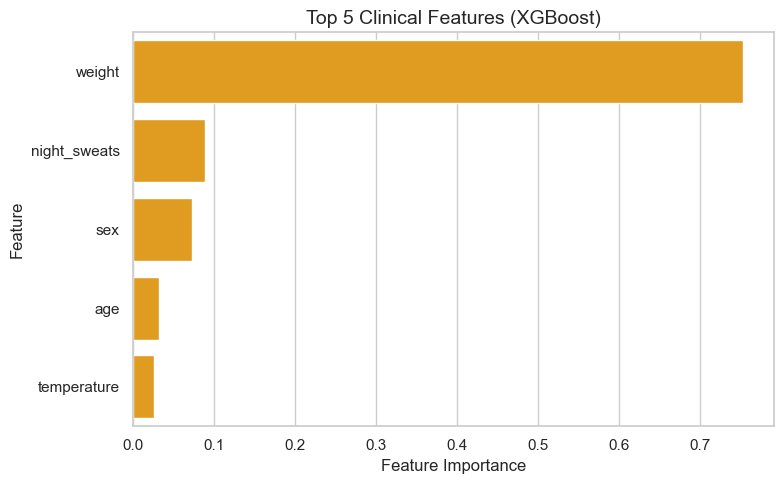

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=top5_clinical_xgb_df, color="orange")
plt.title("Top 5 Clinical Features (XGBoost)", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("top5_clinical_features_xgb_plot.png", dpi=300)
plt.show()

# combiing the 2 best features from random forest and xgboost

In [78]:
# Combined top features from RF and XGBoost manually selected based on importance
combined_clinical_features = ['weight', 'reported_cough_dur', 'night_sweats', 'age', 'temperature']

In [79]:
# Subset and assign clean variable names to avoid overwriting
X_clinical_combined = df[combined_clinical_features]
y_clinical_combined = df[target]

In [80]:
# Train-test split
Xcc_train, Xcc_test, ycc_train, ycc_test = train_test_split(X_clinical_combined, y_clinical_combined, 
                                                            test_size=0.2, stratify=y_clinical_combined, 
                                                            random_state=42)

In [81]:
rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_combined.fit(Xcc_train, ycc_train)

RandomForestClassifier(random_state=42)

In [82]:
# Predict
ycc_pred = rf_combined.predict(Xcc_test)

In [83]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Metrics
print("Accuracy:", accuracy_score(ycc_test, ycc_pred))
print("Classification Report:\n", classification_report(ycc_test, ycc_pred))
print("Confusion Matrix:\n", confusion_matrix(ycc_test, ycc_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1038
   macro avg       1.00      1.00      1.00      1038
weighted avg       1.00      1.00      1.00      1038

Confusion Matrix:
 [[ 58   0]
 [  0 980]]


In [84]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_combined, X_clinical_combined, y_clinical_combined, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.79287091 1.         1.         0.99807322 0.98842816]
Mean CV accuracy: 0.9558744562925142


In [85]:
# checking data leakgae for overfittig or not

In [86]:
from sklearn.model_selection import StratifiedKFold, learning_curve

In [87]:
# Stratified KFold to be consistent
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
# === Learning Curve ===
train_sizes, train_scores, test_scores = learning_curve(
    rf_combined, X_clinical_combined, y_clinical_combined,
    cv=skf, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

In [89]:
# Mean and std
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

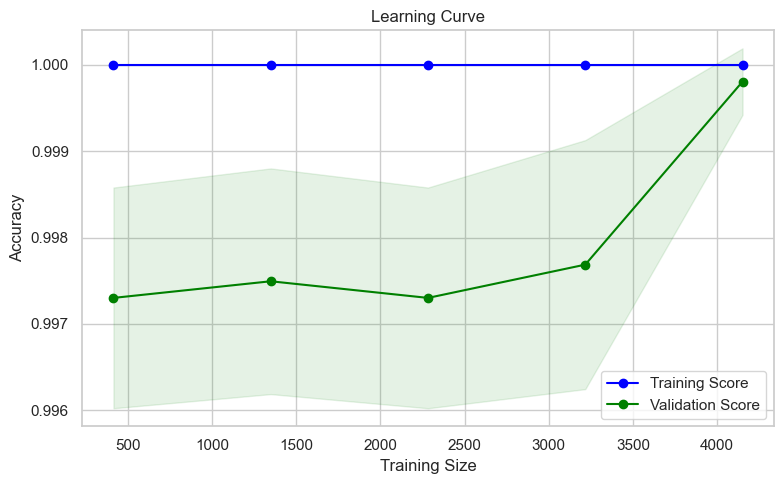

In [90]:
# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
# Print training sizes and corresponding scores
print("Train sizes:", train_sizes)
print("Train accuracies:", train_mean)
print("Train std:", train_std)
print("Validation accuracies:", test_mean)
print("Validation std:", test_std)

Train sizes: [ 415 1349 2283 3217 4151]
Train accuracies: [1. 1. 1. 1. 1.]
Train std: [0. 0. 0. 0. 0.]
Validation accuracies: [0.99730195 0.99749463 0.99730195 0.9976873  0.99980732]
Validation std: [0.00127817 0.00130697 0.00127817 0.0014421  0.00038536]


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, X_clinical_combined, y_clinical_combined, cv=5)

print("Logistic Regression CV Accuracy:", lr_scores)
print("Mean CV Accuracy:", lr_scores.mean())

Logistic Regression CV Accuracy: [0.79287091 1.         1.         0.99807322 0.98939248]
Mean CV Accuracy: 0.9560673203233723


In [93]:
#checking for data redundancy

# Combine features and target into one DataFrame
df_combined = pd.concat([X_clinical_combined, y_clinical_combined], axis=1)

# Correlation of each feature with the target
correlations = df_combined.corr()[y_clinical_combined.name].sort_values(ascending=False)
print("Feature correlations with the target:\n", correlations)

Feature correlations with the target:
 tb_status             1.000000
night_sweats          0.270671
reported_cough_dur   -0.312595
temperature          -0.425124
weight               -0.622838
age                  -0.739957
Name: tb_status, dtype: float64


In [94]:
#X_clinical_combined = X_clinical_combined.drop(columns=['tb_status'])

In [95]:
print(X_clinical_combined.columns)

Index(['weight', 'reported_cough_dur', 'night_sweats', 'age', 'temperature'], dtype='object')


In [96]:
#print(X_combined.columns)

In [97]:
# X = features, y = label
import pandas as pd

df_features = X_clinical_combined.copy()
df_features['tb_status'] = y  # temporarily add label

correlations = df_features.corr()['tb_status'].drop('tb_status')
print(correlations.sort_values(ascending=False))

night_sweats          0.270671
reported_cough_dur   -0.312595
temperature          -0.425124
weight               -0.622838
age                  -0.739957
Name: tb_status, dtype: float64


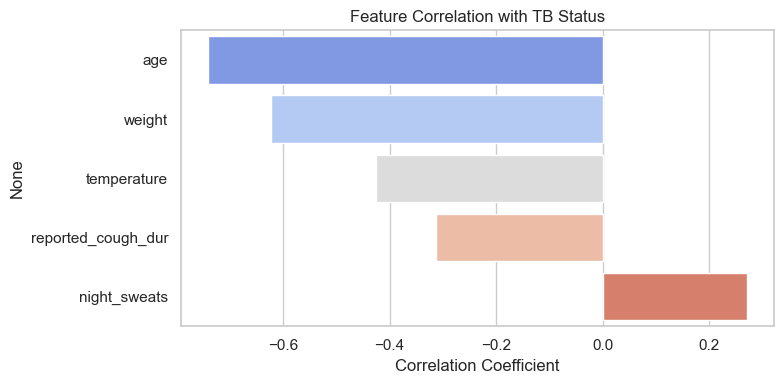

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_features.corr()['tb_status'].drop('tb_status').sort_values()
plt.figure(figsize=(8, 4))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Feature Correlation with TB Status")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

In [99]:
#training with just the tp features from the random forest

In [100]:
audio_features = [f'feat_{i}' for i in range(768)]

# Clinical features
rf_clinical_features = ['weight', 'age', 'reported_cough_dur', 'smoke_lweek', 'temperature']

In [101]:
# Combine all features
all_features = rf_clinical_features + audio_features

In [102]:
X2 = df[all_features]
y2 = df['tb_status']

In [103]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [104]:
rf_model_with_audio = RandomForestClassifier(random_state=42)
rf_model_with_audio.fit(X2_train, y2_train)


RandomForestClassifier(random_state=42)

In [105]:
y2_pred = rf_model_with_audio.predict(X2_test)
y2_proba = rf_model_with_audio.predict_proba(X2_test)[:, 1]  # For AUC

In [106]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("ROC-AUC Score:", roc_auc_score(y2_test, y2_proba))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y2_test, y2_pred))

Accuracy: 0.9980732177263969
ROC-AUC Score: 0.999703828407532

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1038
   macro avg       1.00      0.98      0.99      1038
weighted avg       1.00      1.00      1.00      1038


Confusion Matrix:
 [[ 64   2]
 [  0 972]]


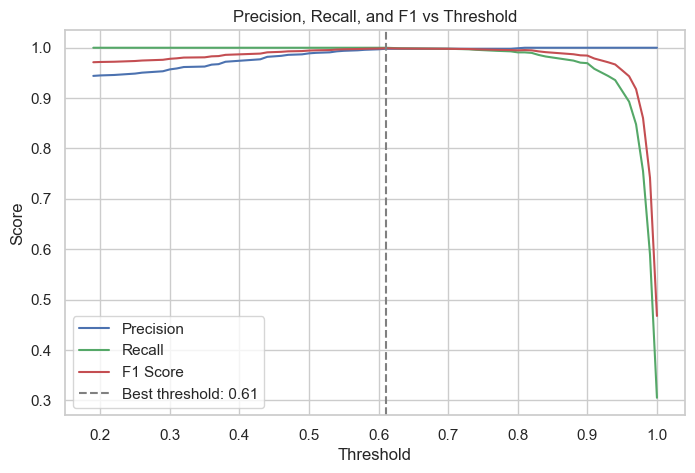

In [152]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision', color='b')
plt.plot(thresholds, recalls[:-1], label='Recall', color='g')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', color='r')
plt.axvline(x=best_threshold, color='gray', linestyle='--', label=f'Best threshold: {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision, Recall, and F1 vs Threshold")
plt.grid(True)
plt.show()

In [108]:
from imblearn.over_sampling import RandomOverSampler


audio_features = [f'feat_{i}' for i in range(768)]
clinical_features = ['weight', 'age', 'reported_cough_dur', 'smoke_lweek', 'temperature']
all_features = clinical_features + audio_features

In [109]:
X_audio = df[all_features]
y_audio = df['tb_status']  


X_audio_train, X_audio_val, y_audio_train, y_audio_val = train_test_split(
    X_audio, y_audio, test_size=0.2, stratify=y_audio, random_state=42
)

In [110]:
ros = RandomOverSampler(random_state=42)
X_audio_train_resampled, y_audio_train_resampled = ros.fit_resample(X_audio_train, y_audio_train)

In [111]:
rf_audio_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_audio_model.fit(X_audio_train_resampled, y_audio_train_resampled)


RandomForestClassifier(random_state=42)

In [112]:
y_audio_probs = rf_audio_model.predict_proba(X_audio_val)[:, 1]

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
precisions, recalls, thresholds = precision_recall_curve(y_audio_val, y_audio_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f" Best Threshold: {best_threshold:.2f}")
print(f"Precision: {precisions[best_index]:.2f}")
print(f"Recall: {recalls[best_index]:.2f}")
print(f"F1-score: {f1_scores[best_index]:.2f}")

 Best Threshold: 0.61
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [153]:
y_audio_pred = (y_audio_probs >= best_threshold).astype(int)

In [154]:
print("\n Classification Report:")
print(classification_report(y_audio_val, y_audio_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1038
   macro avg       1.00      0.98      0.99      1038
weighted avg       1.00      1.00      1.00      1038



 Confusion Matrix:


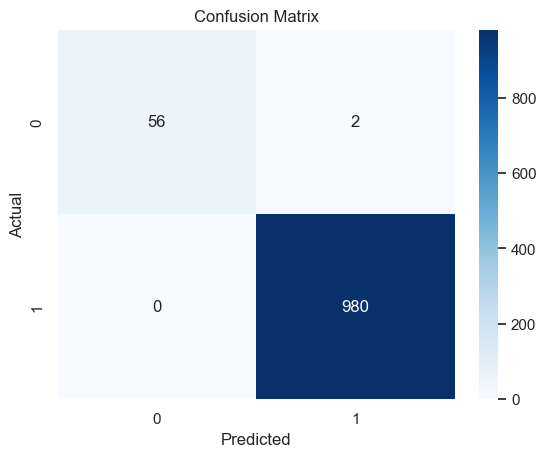

In [155]:
print(" Confusion Matrix:")
cm = confusion_matrix(y_audio_val, y_audio_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [119]:
auc = roc_auc_score(y_audio_val, y_audio_probs)
print(f" ROC AUC Score: {auc:.2f}")

 ROC AUC Score: 1.00


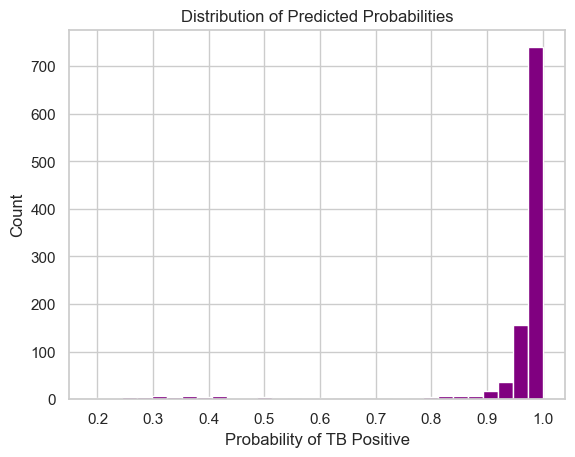

In [120]:
plt.hist(y_audio_probs, bins=30, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of TB Positive")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [121]:
# === 13. Feature Importance ===
importances = rf_audio_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_audio.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

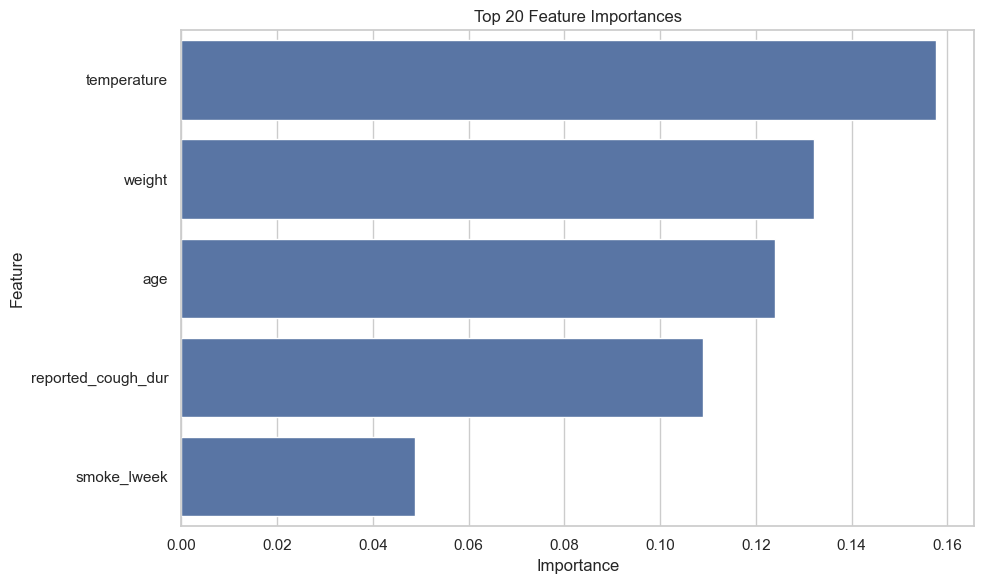

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(5))  # show top 20
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [125]:
import librosa
import io
import ipywidgets as widgets
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [126]:
rf_clinical_features = ['temperature', 'weight', 'age', 'reported_cough_dur', 'smoke_lweek']
audio_features = [f'feat_{i}' for i in range(768)]
all_features = rf_clinical_features + audio_features

In [127]:
# === DUMMY TRAINING FOR MINI MODEL ===
# Create dummy data to simulate model training
np.random.seed(42)
X_dummy = pd.DataFrame(
    np.random.randn(100, len(all_features)),
    columns=all_features
)
y_dummy = np.random.randint(0, 2, 100)


In [128]:
# Split and fit dummy model + scaler
scaler = StandardScaler()
X_dummy[rf_clinical_features] = scaler.fit_transform(X_dummy[rf_clinical_features])
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_dummy, y_dummy)

RandomForestClassifier(random_state=42)

In [133]:
#using class weight to balance in other not to loose much data

In [134]:
# Features and label
X3 = df[all_features]
y3 = df['tb_status']

In [135]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [136]:
# Train model with class_weight
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(X_train3, y_train3)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [137]:
# Predict with the weighted model
y_pred3 = rf_weighted.predict(X_test3)
y_proba3 = rf_weighted.predict_proba(X_test3)[:, 1]

In [138]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test3, y_pred3))
print("ROC AUC Score:", roc_auc_score(y_test3, y_proba3))
print("\nClassification Report:\n", classification_report(y_test3, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test3, y_pred3))

Accuracy: 0.98747591522158
ROC AUC Score: 0.9998207382466642

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        66
           1       0.99      1.00      0.99       972

    accuracy                           0.99      1038
   macro avg       0.99      0.90      0.94      1038
weighted avg       0.99      0.99      0.99      1038

Confusion Matrix:
 [[ 53  13]
 [  0 972]]


In [191]:
df_test = pd.read_csv('solicited_test.csv')

In [192]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [193]:
# Replace Yes/No/Not sure with 1/0 and Male/Female with 1/0
df_test.replace({
    'Yes': 1,
    'No': 0,
    'Not sure': 0,
    'Male': 1,
    'Female': 0
}, inplace=True)

In [194]:
df_test.head(2)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [195]:
tb_status_pred = rf_weighted.predict(df_test[all_features])

In [196]:
tb_status_proba = rf_weighted.predict_proba(df_test[all_features])[:, 1]

In [197]:
df_test['tb_status_pred'] = tb_status_pred
df_test['tb_status_proba'] = tb_status_proba

In [198]:
df_test[['tb_status_pred', 'tb_status_proba']].head()

,tb_status_pred,tb_status_proba
0,1,0.81
1,1,0.81
2,1,0.81
3,1,0.78
4,1,0.74


In [199]:
# From your earlier code:
y_pred3 = rf_weighted.predict(X_test3)
print("Classification Report:\n", classification_report(y_test3, y_pred3))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        66
           1       0.99      1.00      0.99       972

    accuracy                           0.99      1038
   macro avg       0.99      0.90      0.94      1038
weighted avg       0.99      0.99      0.99      1038



In [206]:
from sklearn.metrics import confusion_matrix

# Predict
y_pred3 = rf_weighted.predict(X_test3)

# Confusion Matrix
cm = confusion_matrix(y_test3, y_pred3)

# Print
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 53  13]
 [  0 972]]


In [210]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [211]:
scores = cross_val_score(rf_weighted, X_resampled, y_resampled, cv=skf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


In [212]:
from sklearn.metrics import f1_score, recall_score

f1_scores = cross_val_score(rf_weighted, X_resampled, y_resampled, cv=skf, scoring='f1')
recall_scores = cross_val_score(rf_weighted, X_resampled, y_resampled, cv=skf, scoring='recall')

print("F1 Scores:", f1_scores)
print("Mean F1:", f1_scores.mean())

print("Recall Scores:", recall_scores)
print("Mean Recall:", recall_scores.mean())

F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0
Recall Scores: [1. 1. 1. 1. 1.]
Mean Recall: 1.0


In [214]:
df_test.shape

(9749, 784)

In [227]:
import numpy as np
import torch
import torchaudio
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from transformers import Wav2Vec2Processor, Wav2Vec2Model

In [228]:
# === Load Wav2Vec2 Processor & Model ===
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec_model.eval()

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Wav2Vec2Model(
  (feature_extractor): Wav2Vec2FeatureEncoder(
    (conv_layers): ModuleList(
      (0): Wav2Vec2GroupNormConvLayer(
        (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
        (activation): GELUActivation()
        (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
      )
      (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
      (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
        (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
        (activation): GELUActivation()
      )
    )
  )
  (feature_projection): Wav2Vec2FeatureProjection(
    (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (projection): Linear(in_features=512, out_features=768, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Wav2Vec2Encoder(
    (pos_conv_embed): Wav2Vec2PositionalConvEmbedding(
  

In [245]:
# Threshold
CONFIDENCE_THRESHOLD = 0.88

# === Audio Feature Extraction ===
def extract_wav2vec2_features(audio_bytes):
    waveform, sample_rate = torchaudio.load(io.BytesIO(audio_bytes))
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0).unsqueeze(0)
    with torch.no_grad():
        inputs = processor(waveform.squeeze(), sampling_rate=16000, return_tensors="pt", padding=True)
        outputs = wav2vec_model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding.squeeze().numpy()  # shape: (768,)

# === Clinical Input Widgets ===
temperature = widgets.FloatText(description="Temp:")
weight = widgets.FloatText(description="Weight:")
age = widgets.IntText(description="Age:")
cough_duration = widgets.IntText(description="Cough Days:")
smoked_lweek = widgets.IntText(description="Smoked? (0/1):")
audio_upload = widgets.FileUpload(accept='.wav', multiple=False, description="Upload Audio (Optional)")

output = widgets.Output()

# === Prediction Logic ===
def on_predict_clicked(b):
    with output:
        clear_output()
        try:
            # Clinical features
            clinical_features = np.array([
                temperature.value,
                weight.value,
                age.value,
                cough_duration.value,
                smoked_lweek.value
            ], dtype=np.float32)  # shape: (5,)

            # Default audio features to zero (optional case)
            audio_features = np.zeros(768, dtype=np.float32)  # Wav2Vec2 base embedding size

            # If audio is uploaded, extract real features
            if audio_upload.value:
                uploaded_items = audio_upload.value
                uploaded_file = next(iter(uploaded_items.values())) if isinstance(uploaded_items, dict) else uploaded_items[0]
                audio_bytes = uploaded_file['content']
                filename = uploaded_file.get('metadata', {}).get('name', 'audio.wav')

                if filename.endswith('.wav'):
                    audio_features = extract_wav2vec2_features(audio_bytes)
                else:
                    print("Invalid audio file. Only .wav supported.")
                    return

            # Combine features and predict
            all_features = np.concatenate((clinical_features, audio_features)).reshape(1, -1)
            prob = rf_weighted.predict_proba(all_features)[0][1]
            pred = int(prob >= CONFIDENCE_THRESHOLD)

            # Output
            if pred == 1:
                msg = "TB Prediction: Probable TB"
                if prob >= 0.8:
                    msg += " (High Confidence)"
                elif prob >= CONFIDENCE_THRESHOLD:
                    msg += " (Moderate Confidence)"
            else:
                msg = "TB Prediction: Unlikely TB"

            print(msg)
            print(f"Confidence Score: {prob:.2f}")

        except Exception as e:
            print(f"Error: {e}")

# === Predict Button ===
predict_btn = widgets.Button(description="Predict", button_style="success")
predict_btn.on_click(on_predict_clicked)

# === Display Interface ===
display(widgets.VBox([
    widgets.Label("Enter Clinical Data:"),
    temperature, weight, age, cough_duration, smoked_lweek,
    widgets.Label("Upload Audio (.wav only - Optional):"),
    audio_upload,
    predict_btn,
    output
]))

In [ ]:
# secondly note the aboev

In [246]:
joblib.dump(rf_weighted, 'one_tb_predictor_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [201]:
df_test = pd.read_csv("solicited_test.csv")

In [202]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [203]:
# Replace Yes/No/Not sure with 1/0 and Male/Female with 1/0
df_test.replace({
    'Yes': 1,
    'No': 0,
    'Not sure': 0,
    'Male': 1,
    'Female': 0
}, inplace=True)

In [204]:
df_test.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,feat_107,feat_108,feat_109,feat_110,feat_111,feat_112,feat_113,feat_114,feat_115,feat_116,feat_117,feat_118,feat_119,feat_120,feat_121,feat_122,feat_123,feat_124,feat_125,feat_126,feat_127,feat_128,feat_129,feat_130,feat_131,feat_132,feat_133,feat_134,feat_135,feat_136,feat_137,feat_138,feat_139,feat_140,feat_141,feat_142,feat_143,feat_144,feat_145,feat_146,feat_147,feat_148,feat_149,feat_150,feat_151,feat_152,feat_153,feat_154,feat_155,feat_156,feat_157,feat_158,feat_159,feat_160,feat_161,feat_162,feat_163,feat_164,feat_165,feat_166,feat_167,feat_168,feat_169,feat_170,feat_171,feat_172,feat_173,feat_174,feat_175,feat_176,feat_177,feat_178,feat_179,feat_180,feat_181,feat_182,feat_183,feat_184,feat_185,feat_186,feat_187,feat_188,feat_189,feat_190,feat_191,feat_192,feat_193,feat_194,feat_195,feat_196,feat_197,feat_198,feat_199,feat_200,feat_201,feat_202,feat_203,feat_204,feat_205,feat_206,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,feat_306,feat_307,feat_308,feat_309,feat_310,feat_311,feat_312,feat_313,feat_314,feat_315,feat_316,feat_317,feat_318,feat_319,feat_320,feat_321,feat_322,feat_323,feat_324,feat_325,feat_326,feat_327,feat_328,feat_329,feat_330,feat_331,feat_332,feat_333,feat_334,feat_335,feat_336,feat_337,feat_338,feat_339,feat_340,feat_341,feat_342,feat_343,feat_344,feat_345,feat_346,feat_347,feat_348,feat_349,feat_350,feat_351,feat_352,feat_353,feat_354,feat_355,feat_356,feat_357,feat_358,feat_359,feat_360,feat_361,feat_362,feat_363,feat_364,feat_365,feat_366,feat_367,feat_368,feat_369,feat_370,feat_371,feat_372,feat_373,feat_374,feat_375,feat_376,feat_377,feat_378,feat_379,feat_380,feat_381,feat_382,feat_383,feat_384,feat_385,feat_386,feat_387,feat_388,feat_389,feat_390,feat_391,feat_392,feat_393,feat_394,feat_395,feat_396,feat_397,feat_398,feat_399,feat_400,feat_401,feat_402,feat_403,feat_404,feat_405,feat_406,feat_407,feat_408,feat_409,feat_410,feat_411,feat_412,feat_413,feat_414,feat_415,feat_416,feat_417,feat_418,feat_419,feat_420,feat_421,feat_422,feat_423,feat_424,feat_425,feat_426,feat_427,feat_428,feat_429,feat_430,feat_431,feat_432,feat_433,feat_434,feat_435,feat_436,feat_437,feat_438,feat_439,feat_440,feat_441,feat_442,feat_443,feat_444,feat_445,feat_446,feat_447,feat_448,feat_449,feat_450,feat_451,feat_452,feat_453,feat_454,feat_455,feat_

In [183]:
#saving the model

In [184]:
#import joblib

In [247]:
#joblib.dump(rf_weighted, 'tb_predictor_model.pkl')
#print("Model saved successfully.")

In [248]:
import sklearn
print(sklearn.__version__)

1.6.1
